In [4]:
import numpy as np
from matplotlib import pyplot as plt
import os.path as osp

In [5]:
def str_to_float_scores(line):
    return list(map(float, line.split(',')))

In [9]:
save_root = '/media/xreco/DEV/xiran/data/social_and_user_item/model_outputs/figure'
record_file = '/media/xreco/DEV/xiran/data/social_and_user_item/model_outputs/gnn_yelp2018/xgcn/case_study/reset_param/[2dnn][2layer-ffn][prop1][reg1e-3][T15-K15][load_best=1][USE_SNN=0][endure=9]/train_record.txt'

In [10]:
metric = 0  # recall@20
score_list = []
epoch_list = []

score_list_prop = []
epoch_list_prop = []

score_list_loss = []
epoch_list_loss = []

epoch = 0
with open(record_file, 'r') as f:
    f.readline()  # skip the first line
    done = False
    while not done:
        line = f.readline()
        if line == '':
            done = True
        else:
            if line[0] == 'a':  # 'after prop:...'
                line = line[len('after prop:'):]
                x = str_to_float_scores(line)
                s = x[metric]
                score_list_prop.append(s)
                epoch_list_prop.append(epoch)
            else:
                x = str_to_float_scores(line)
                s = x[metric]
                epoch = x[-1]
                loss = x[-2]
                
                score_list.append(s)
                epoch_list.append(epoch)
                
                score_list_loss.append(loss)
                epoch_list_loss.append(epoch)

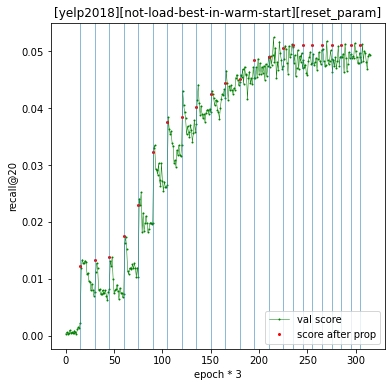

In [11]:
fig, axs = plt.subplots(1 , 1, figsize=(6, 6))

ax = axs

ax.plot(epoch_list, score_list, 'go-', linewidth=0.5, markersize=1, label='val score')
# ax.plot(epoch_list_loss, score_list_loss, 'bo-', linewidth=0.5, markersize=1, label='loss')
ax.plot(epoch_list_prop, score_list_prop, 'ro', linewidth=0.5, markersize=2, label='score after prop')

for e in epoch_list_prop:
    ax.axvline(e, linewidth=0.5)

# # score of pure propagation
# pure_prop_score = 0.1193
# # pure_prop_score = 0.03911
# # pure_prop_score = 0.01631
# plt.text(250, pure_prop_score+0.001, 'pure prop 12 times')
# ax.axhline(pure_prop_score, color='black', linewidth=0.5)

# pure_prop_score = 0.05498
# # pure_prop_score = 0.02173
# # pure_prop_score = 0.00822
# plt.text(250, pure_prop_score+0.001, 'pure prop 7 times')
# ax.axhline(pure_prop_score, color='black', linewidth=0.5)

ax.set_xlabel('epoch * 3')
ax.set_ylabel('recall@20')
ax.legend(loc='lower right')

title = '[yelp2018][not-load-best-in-warm-start][reset_param]'
plt.title(title)

plt.savefig(osp.join(save_root, title + '.pdf'), 
            dpi=300,  bbox_inches='tight')
plt.show()